# Memes vs Notes
This is the numpy version of same classifier we used before but everything is made from scratch.

In [31]:
import numpy as np

In [32]:
import PIL
from PIL import Image
import numpy as np
import os

In [33]:
def init_items(sizes):
    W = []
    B = []
    for i,j in zip(sizes[1:], sizes[:-1]):
        w = np.random.randn(i,j) * 0.01
        b = np.random.randn(i,1) * 0.01
        W.append(w)
        B.append(b)
        print(w.shape, b.shape)
        length = len(sizes)
    return W,B,length

In [34]:
def network(X, Y, W, B, epochs, size):
    n = Y.shape[1]
    minibatch = 50
    cost_list = []
    train_accu = []
    test_accu = []
    val_accu = []
    #print('no .of examples = ', n)
    for epoch in range(epochs):

        print('Epoch : ',epoch, '\t',end='')
        X_mini = []
        Y_mini = []
        for k in range(0, n, minibatch ):
            X_mini.append(X[:, k:k+minibatch])
            Y_mini.append(Y[:, k:k+minibatch])
        for x,y in zip(X_mini,Y_mini):
            Y_des = Y_desired(y)
            backprop(x, Y_des, W, B, minibatch, size)
         
        Y_des_1 = Y_desired(Y)
        A = predict_Y(X, W, B)
        print('cost : ',cost(Y_des_1, A))
        cost_list.append(cost(Y_des_1, A))
        
        t = accuracy_check(train_set)
        train_accu.append(t)
        print('Train accuracy : ',t,end = ' , ')
        
        t = accuracy_check(val_set)
        val_accu.append(t)
        print('valid accuracy : ',t,end = ' , ')
        
        t = accuracy_check(test_set)
        test_accu.append(t)
        print('Test accuracy : ',t)
        print()
    return cost_list, train_accu, val_accu, test_accu

In [35]:
def backprop(X, Y_des, W, B, mini_size, size):
    A = for_prop(X, W, B)
    dZ = A[-1] - Y_des
    #print(dZ.shape, A[-2].T.shape, mini_size)
    dW = np.dot(dZ, A[-2].T)/mini_size
    dB = np.sum(dZ, axis=1, keepdims = True)/mini_size
    delta_W = [dW]
    delta_B = [dB]
    #print(size)
    for i in range(2, size):
        dZ = np.dot(W[-i+1].T, dZ) * A[-i] * (1-A[-i])
        dW = np.dot(dZ, A[-i-1].T)/mini_size
        dB = np.sum(dZ, axis=1, keepdims = True)/mini_size
        delta_W.append(dW)
        delta_B.append(dB)
    for i in range(size-1):
        W[i] = W[i] - delta_W[size-2-i] * 0.5
        #print('before b : ', B[i].shape, delta_B[size-2-i].shape)
        B[i] = B[i] - delta_B[size-2-i] * 0.5
        #print('afterr b : ', B[i].shape)

    #return W,B

In [36]:
def for_prop(X, W, B):
    A = X
    A_cache = [A]
    for w,b in zip(W,B):
        Z = np.dot(w, A) + b
        A = sigmoid(Z)
        A_cache.append(A)
    return A_cache

In [37]:
def sigmoid(Z):
    return 1/(1 + np.exp(-Z))

In [38]:
def Y_desired(Y):
    Y_des = np.zeros((2, Y.shape[1]))
    for i in range(Y_des.shape[0]):
        for j in range(Y_des.shape[1]):
            if Y[0,j] == i:
                Y_des[i,j] = 1
    return Y_des

In [39]:
def cost(Y_des, A):
    L = (Y_des*np.log(A) + (1-Y_des)*np.log(1-A))
    L = -L
    J = np.sum(L, axis=1)/A.shape[1]
    J = np.sum(J, axis=0)/A.shape[0]
    return(J)

In [40]:
def predict_Y(X, W ,B):
    A = X
    for w,b in zip(W,B):
        #print(w.shape,A.shape)
        Z = np.dot(w, A) + b
        A = sigmoid(Z)
    return A

In [41]:
def rgb2gray(img):

    r, g, b = img[:,:,0], img[:,:,1], img[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return gray

In [42]:
directory = r'C:/Users/tpath/Desktop/GitHub/Stage_1/Memes/' #Location of preprocessed memes images
imgs = []
for filename in os.listdir(directory):               #Iterate over images
    img = Image.open(directory + filename)
    img = img.resize((80,80))  
    img = np.array(img)                              #Convert images to numpy arrays
    img = rgb2gray(img)
    img = np.reshape(img,-1)                         #This function will convert (256*256*3) into (3*256*256) images.                                               #Its important because pytorch m=module accept images in second format only
    img = [img , 1]                                  #Labeling images {1 for memes}
    imgs.append(img)
directory = r'C:/Users/tpath/Desktop/GitHub/Stage_1/Notes/' #Location of preprocessed notes images
for filename in os.listdir(directory):
    img = Image.open(directory + filename)
    img = img.resize((80,80))
    img = np.array(img)
    img = rgb2gray(img)
    img = np.reshape(img,-1)
    img = [img , 0]                                  ##Labeling images {0 for notes}
    imgs.append(img)

In [43]:
imgs[0][0].shape

(6400,)

In [44]:
train_set = imgs[0:750] + imgs[800:1550]
test_set = imgs[750:775] + imgs[1550:1575]
val_set = imgs[775:800] + imgs[1575:1600]
np.random.shuffle(train_set)
np.random.shuffle(test_set)
np.random.shuffle(val_set)

In [45]:
len(train_set)
train_set[0][0].shape[0]

6400

In [46]:
def batch_maker(t_set, batch_size=1):
    loader_set = []
    for i in range(0,len(t_set),batch_size):
        t_data = []
        t_label = []
        for j in range(batch_size):
            t_data.append(t_set[i+j][0])
            t_label.append(t_set[i+j][1])
        loader_set.append([t_data , t_label])
    return loader_set

In [47]:
def accuracy_check(t_set):
    '''A_test = predict_Y(X, W, B)
    A_hat = []
    for i in range(Y.shape[1]):
        a = np.argmax(A_test[:, i])
        A_hat.append(a)
        #print(A_hat)
    count = 0
    for i in range(Y.shape[1]):
        if Y[0,i] == A_hat[i]:
            count += 1
    print('train accuracy = ', count/1500)'''
    
    load = batch_maker(t_set, len(t_set))
    X_test = load[0][0]
    X_test = np.array(X_test).T
    X_test = X_test/256
    #print(X_test.shape)
    Y_test = load[0][1]
    Y_test = np.array(Y_test)
    Y_test = Y_test.reshape(1,Y_test.shape[0])
    #print(Y_test.shape)
    
    A_test = predict_Y(X_test, W, B)
    A_hat = []
    for i in range(Y_test.shape[1]):
        a = np.argmax(A_test[:, i])
        A_hat.append(a)
        #print(A_hat)
    count = 0
    for i in range(Y_test.shape[1]):
        if Y_test[0,i] == A_hat[i]:
            count += 1
    return (count/len(t_set))*100
    
    
    '''load = batch_maker(test_set, 50)
    X_test = load[0][0]
    X_test = np.array(X_test).T
    X_test = X_test/256
    #print(X_test.shape)
    Y_test = load[0][1]
    Y_test = np.array(Y_test)
    Y_test = Y_test.reshape(1,Y_test.shape[0])
    #print(Y_test.shape)
    
    A_test = predict_Y(X_test, W, B)
    A_hat = []
    for i in range(Y_test.shape[1]):
        a = np.argmax(A_test[:, i])
        A_hat.append(a)
        #print(A_hat)
    count = 0
    for i in range(Y_test.shape[1]):
        if Y_test[0,i] == A_hat[i]:
            count += 1
    print('test accuracy = ', count/50)'''

In [48]:
load = batch_maker(train_set, 1500)

In [49]:
X_train = load[0][0]
X_train = np.array(X_train).T
X_train = X_train/256
#print(X.shape)
Y_train = load[0][1]
Y_train = np.array(Y_train)
Y_train = Y_train.reshape(1,Y_train.shape[0])
print(Y_train.shape)

(1, 1500)


In [56]:
W,B,size = init_items([train_set[0][0].shape[0],1000,100,2])

(1000, 6400) (1000, 1)
(100, 1000) (100, 1)
(2, 100) (2, 1)


In [57]:
nepoch = 15
cost_list, train_accu, val_accu, test_accu = network(X_train, Y_train, W, B, nepoch, size)

Epoch :  0 	cost :  0.693137153177501
Train accuracy :  50.0 , valid accuracy :  50.0 , Test accuracy :  50.0

Epoch :  1 	cost :  0.6916256005436723
Train accuracy :  64.46666666666667 , valid accuracy :  96.0 , Test accuracy :  54.0

Epoch :  2 	cost :  0.6880332730332588
Train accuracy :  68.4 , valid accuracy :  98.0 , Test accuracy :  60.0

Epoch :  3 	cost :  0.6719144120213381
Train accuracy :  75.6 , valid accuracy :  96.0 , Test accuracy :  84.0

Epoch :  4 	cost :  0.5691235751602037
Train accuracy :  83.33333333333334 , valid accuracy :  90.0 , Test accuracy :  80.0

Epoch :  5 	cost :  0.47433026569267434
Train accuracy :  80.60000000000001 , valid accuracy :  90.0 , Test accuracy :  78.0

Epoch :  6 	cost :  0.4414969999247429
Train accuracy :  82.73333333333333 , valid accuracy :  90.0 , Test accuracy :  82.0

Epoch :  7 	cost :  0.42371307218248005
Train accuracy :  83.8 , valid accuracy :  90.0 , Test accuracy :  80.0

Epoch :  8 	cost :  0.40227616154204193
Train accur

In [58]:
import matplotlib.pyplot as plt

In [59]:
nepoch = 15
epoch_num = list(range(nepoch))

Text(0, 0.5, 'total loss')

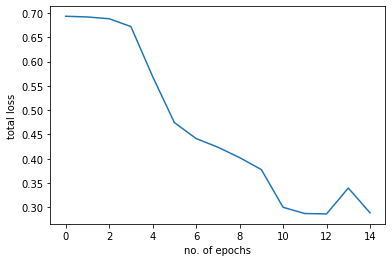

In [60]:
plt.plot(epoch_num, cost_list)
plt.xlabel('no. of epochs')
plt.ylabel('total loss')

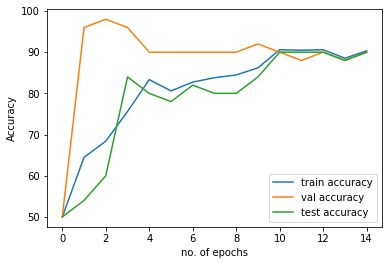

In [61]:
plt.plot(epoch_num, train_accu, label = 'train accuracy')
plt.plot(epoch_num, val_accu, label= 'val accuracy')
plt.plot(epoch_num, test_accu, label = 'test accuracy')
plt.xlabel('no. of epochs')
plt.ylabel('Accuracy')
plt.legend(loc="lower right")